# Exercícios de fixação sobre: Pandas, Matplotlib e Seaborn

Elaborado por <a href="https://www.linkedin.com/in/bruno-coelho-277519129/">Bruno Gomes Coelho</a>, para as aulas do grupo [DATA](https://github.com/icmc-data).

### Instruções:
Siga o passo do notebook, adiconando seu códiga toda vez que ver um `# your code here`.
Caso o prazo ainda esteja aberto, (até a próxima aula) submeta sua resposta [nesse google forms](https://goo.gl/forms/6pXx1AjD4rjES1Tp2) para saber quantas acertou.

<br>
<br>
<br>
<br>
<br>

<br>

## Carregas bibliotecas úteis e setar padrões

<br>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set() # Essa linha configura para usar os padrões do seaborn, recomendo

<br>

## Carregar o dataset

Para este exercício, usaremos o conjunto de dados do [Boston Housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). Com eles temos dados socio-económicos de uma região, e o preço médio das casas daquela região.

Para facilitar nossa vida, não vamos pegar os dados do UCI e sim direto da biblioteca Scikit-Learn, que usaremos mais a fundo nas próximas aulas. Para instalar ela, uma dessas 3 opções é para dar certo:

- pip install scikit-learn
- conda install scikit-learn
- python3 -m pip install scikit-learn
- sudo python3 -m pip install scikit-learn

Se tudo falhar, de uma olhada no [guia deles](https://scikit-learn.org/stable/install.html) de instalação ou fale com um dos organizadores.

<br>

In [3]:
# Depois de instalado, essa linha deve rodar sem erro:
from sklearn.datasets import load_boston

In [4]:
# Como dataset vem dividido em features e target, 
#      vamos juntar os dois num único DataFrame.
boston_data = load_boston()

# Primeiro as features
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Agora o nosso target (valor que queremos prever)
df["target"] = boston_data.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<br>

## Descreva os dados da nossa tabela

DICA: A função que vc quer mostra quantidade, média, std, (..) para cada uma de nossas colunas...

<br>

In [25]:
# your code here

<br>

## Com base no resultado da função acima, responda:

<br>

<br>

## Q1: Qual feature possui a maior média (mean)?

- CRIM
- ZN
- INDUS
- CHAS
- NOX
- RM
- AGE
- DIS
- RAD
- TAX
- PTRATIO
- B
- LSTAT
- target


<br>

<br>

## Q2: Quantas features possuem todos os valores entre [0, 1] ?
**OBS**: A notação de colchetes indica que os extremos são inclusos.

- 0
- 1
- 2
- 3
- 4

<br>

<br>
Voltanto agora a codar, responda....

## Q3: Essa base possui nulos?
- Não
- Sim

**OBS**: Se possuir nulos, remova eles da base nessa célula abaixo para não influenciarem no resto do exercício

<br>

In [31]:
# your code here

<br>

No nossa conjunto de dados, cada linha representa uma região diferente, com divesas informações daquela região em cada coluna;

Nossa coluna "target" contem o preço da médio das casas daquela região.

Vale a pena ressaltar que o preço está em milhares de dólares!

Vamos analisar as casas que custam mais/menos de 20 míl.

## Q4: Aproximadamente qual porcentagem de regiões possuem um preço maior ou igual a 20 míl doláres?

- 32 %
- 47 %
- 54 %
- 63 %

<br>

In [36]:
# your code here

<br>

No nosso conjunt de dados, existe uma feature chamada **CHAS**. Ela indica se aquela região está ou não próxima do [rio Charles](https://en.wikipedia.org/wiki/Charles_River). 

Vamos verificar que ela só possui dois valores, 0 ou 1.

Nesse caso, 1 indica que a região está próxima do rio.

<br>

In [50]:
# De fato, só dois valores.
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<br>

Queremos saber se o fato de estar mais perto do rio faz uma diferença no preço da casa;

Para isso, podemos plotar a distribuição do preço ("target"), tanto para quando está próxima do rio, quando para não esta e ver se há uma diferença. 

## Q5: Considerando casas perto e longes do rio, assinale as alternativas corretas:

- As casas perto do rio parecem se concentrar mais em volta de 20 míl doláres do que as longes do rio.

- A distribuição de preço para as casas próximas ao rio parece ser uma [distribuição bimodal](https://en.wikipedia.org/wiki/Multimodal_distribution)

- Parece que casas longe do rio tendem a estar distribuidas nas faixas caras (acima de 40 míl) mais que as casas perto do rio.

**OBS**: Conseguimos fazer isso em duas linhas! (mas pode quebrar em mais para a indexação ficar mais legível se quiser)

**OBS 2**: Lembra de um tal parâmetro de "label" que usamos em algum tipo de plot...?

**OBS 3**: Use `hist=False` para ficar mais bonitinho ;)

<br>

In [59]:
# your code here

<br>

Vamos agora considerar um subconjunto de features para analisar as suas distribuições por quartis.

<br>

In [80]:
subset = df.columns[[2, 4, 5, 6, 8, 10, 12]]

<br>

Plote a distruibuição em quartis para cada uma das colunas definidas acima. Perceba que consegue fazer isso com um `for` se lembrar de chamar `plt.show()` para cada iteração.

Dessa forma, sera gerado len(subset) plots, um debaixo do outro

<br>

In [82]:
# your code here

<br>

Agora responda:

## Q6: Qual feature possui o maior região entre a mediana e o 3<sup>o</sup> quartil? 

- INDUS
- NOX
- RM
- AGE
- RAD
- PTRATIO
- LSTAT


<br>

<br>

## Q7: Qual feature possui outliers tanto a esquerda como a direita das faixas de valores esperados?

- INDUS
- NOX
- RM
- AGE
- RAD
- PTRATIO
- LSTAT

**OBS**: Use como definição de [outliers](https://en.wikipedia.org/wiki/Outlier), quem não está na faixa (Q1−1.5⋅IQR, Q3+1.5⋅IQR).

<br>

<br>

Vamos agora considerar um subconjunto de features para analisar as suas distribuições e correlações

<br>

In [70]:
subset = ['RM', 'AGE', 'DIS', 'B', 'LSTAT', 'target']

<br>

Plote as relações entre essas 5 features acimas e responda:

<br>

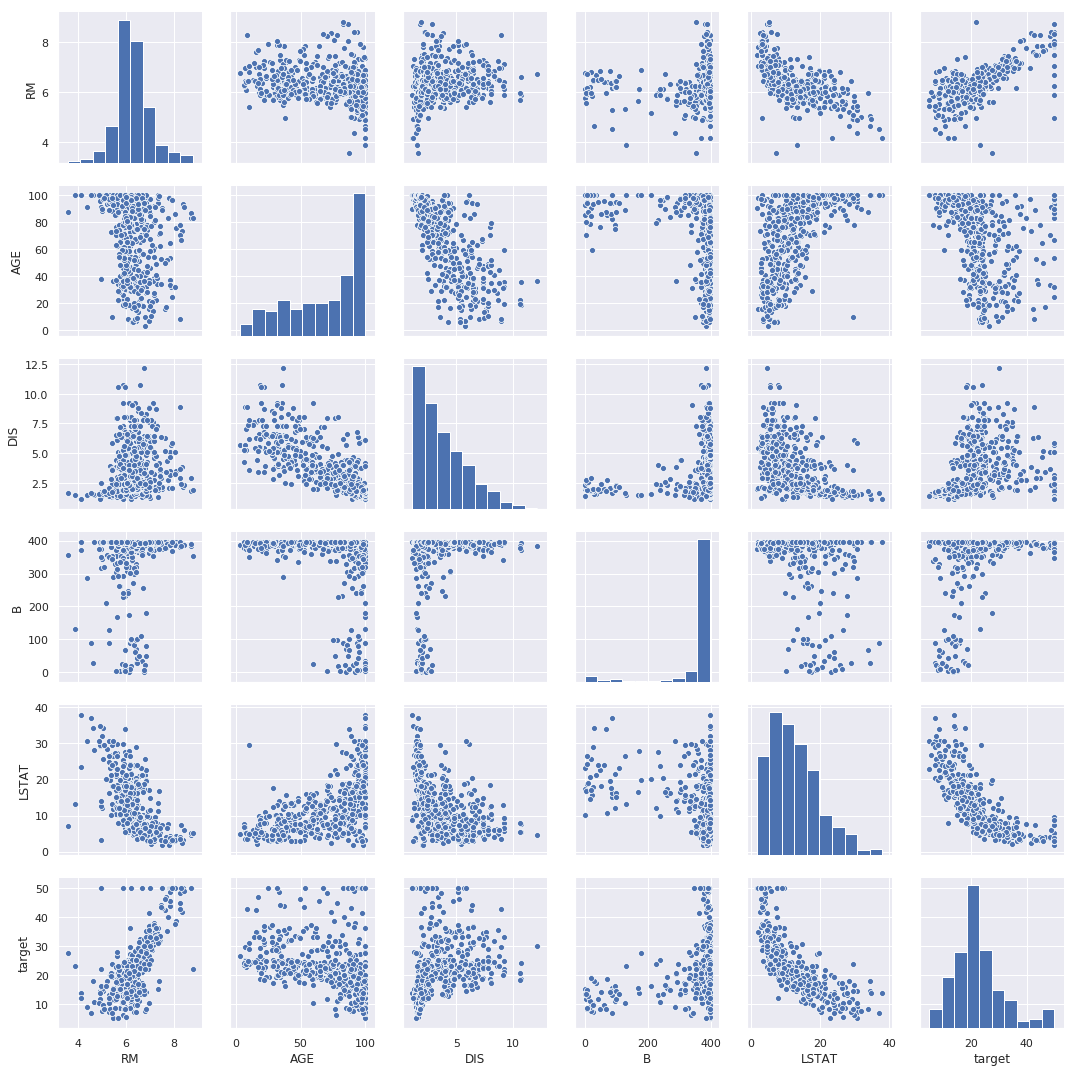

In [71]:
sns.pairplot(df[subset])

<br>

## Q8: Qual feature parece ter a grande maioria dos seus valores numa pequena faixa?

- RM
- AGE
- DIS
- B
- LSTAT
- target

<br>

## Aqui acabam as perguntas :)

![](https://i.imgflip.com/s5spp.jpg)

## Como um bonus, vamos agora exemplificar a importância de entender seus dados, e como o trabalho de um cientista de dados pode ser benéfico (ou não) para a sociedade.

<br>

Sempre que lidamos com dados reais, criando modelos que impactam as pesssoas, temos que ter um cuidado gigante.

Nesse nosso pequeno problema por exemplo, a variável **B** possui uma relação com a quantidade de pessoas que se autodeclaram afrodescendente na cidade da região analisada; 

Perceba que em nenhuma altura da análise, nos preocupamos em como os dados foram adiquiridos e se foram anonimizados; nesse caso os dados não são tão pessoais pois são uma média de uma região, mas poderia ser um dataset sobre consumidores diferentes, em que informações pessoais são coletadas sem as devidas permissões;

<br>

<br>

Vamos analisar melhor a variável B. Ela é definida como B = 1000(Bk - 0.63)^2 onde Bk é a proporção de pessoas autodeclaradas afrodescendente. Com base na imagem abaixo, podemos perceber que valores acima de 150 para a variávelo B indicam um Bk alto:

<br>

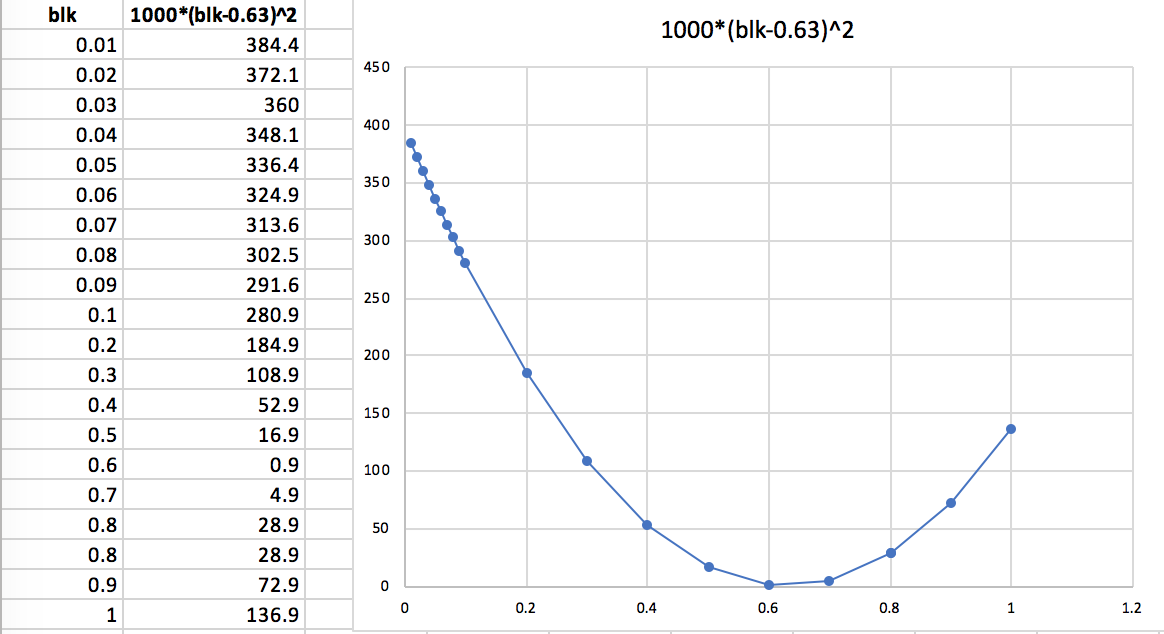

<br>

Vamos analisar agora o preço das casas em relação a B. Vamos definir um index_binário, B > 150.

<br>

In [115]:
low_bk = df["B"] > 150

/home/bcoelho/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


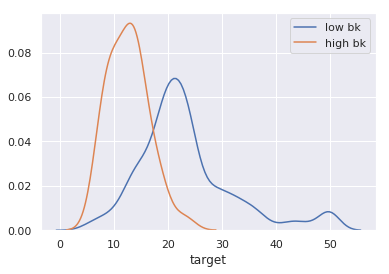

In [116]:
sns.distplot(df[low_bk]["target"], label="low bk", hist=False)
sns.distplot(df[~low_bk]["target"], label="high bk", hist=False)

<br>

Aqui já conseguimos ver um possível problema de usar dados sem pensar sobre eles no nosso modelo; Especialmente em problemas que envolvem [Séries Temporais](https://en.wikipedia.org/wiki/Time_series) (isto é, dados históricos que variam ao longo do tempo), toda vez que voltamos no passado, estamos dando a chance do nosso modelo apreender padrões do passado - e com a escala que IA é utilizado, tendo um grande impacto na vida dos outros.

<br>

<br>

Esse problema também não é tão simples de ser resolvido: se simplesmente não coletarmos dados sensíveis, que podem causar nosso modelo a discriminar, como podemos saber se estamos discriminando?

Variáveis frequentemente possuem correlações no mundo real: Se não queremos discriminar por gênero por exemplo, não bastaria só eliminar essa coluna, pois frequentemente o peso e altura possuem uma correlação.

<br>

<br>

Resumindo, perceba a importância de entender seus dados e os resultados do seu trabalho na sociedade conforme progredir na carreira de cientista de dados;

Um cientista é aquele que questiona tudo - leve isso adiante :)

<br>

![](https://s.hdnux.com/photos/70/27/07/14774752/3/920x920.jpg)

Não esqueça de submeter as respostas [AQUI](https://goo.gl/forms/6pXx1AjD4rjES1Tp2)